In [11]:
import pandas as pd

ruta = "F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/dataset_preprocesado/dataset_abstract_preprocesado.csv"

datos = pd.read_csv(ruta)
datos

,title,abstract,categorical,categoria,cat_one_hot,abstract_limpio,abstract_preprocesado
0,Electromagnetic neutrinos in laboratory experi...,An overview of neutrino electromagnetic proper...,astrophysics,humano,"[1, 0, 0, 0, 0]",An overview of neutrino electromagnetic proper...,"['overview', 'neutrino', 'electromagnetic', 'p..."
1,Infrared complex refractive index of astrophys...,In dense and cold regions of the interstellar ...,astrophysics,humano,"[1, 0, 0, 0, 0]",In dense and cold regions of the interstellar ...,"['dense', 'cold', 'region', 'interstellar', 'm..."
2,Gamma-ray lines in modern astrophysics,Gamma-ray astronomy provides a direct window i...,astrophysics,humano,"[1, 0, 0, 0, 0]",Gamma-ray astronomy provides a direct window i...,"['gamma-ray', 'astronomy', 'provides', 'direct..."
3,From Coulomb excitation cross sections to non-...,Coulomb and nuclear dissociation of $^{17}$Ne ...,astrophysics,humano,"[1, 0, 0, 0, 0]",Coulomb and nuclear dissociation of $^{17}$Ne ...,"['coulomb', 'nuclear', 'dissociation', 'ne', '..."
4,Astrophysical Black Holes: A Compact Pedagogic...,Black holes are among the most extreme objects...,astrophysics,humano,"[1, 0, 0, 0, 0]",Black holes are among the most extreme objects...,"['black', 'hole', 'among', 'extreme', 'object'..."
...,...,...,...,...,...,...,...
7745,Superconducting LaAlO3/SrTiO3 Nanowires,Here's a rewritten version of the text using m...,superconductivity,llama3,"[0, 0, 0, 0, 1]",\n\nWe've achieved a groundbreaking breakthrou...,"[""'ve"", 'achieved', 'groundbreaking', 'breakth..."
7746,Coupling a single Nitrogen-Vacancy center to a...,Here's a rewritten version of the text in my o...,superconductivity,llama3,"[0, 0, 0, 0, 1]",\n\nWe propose a groundbreaking idea: connecti...,"['propose', 'groundbreaking', 'idea', 'connect..."
7747,Superconducting and Anti-Ferromagnetic Phases ...,Here's a rewritten version of the text using m...,superconductivity,llama3,"[0, 0, 0, 0, 1]",\n\nThis study establishes a connection betwee...,"['study', 'establishes', 'connection', 'two', ..."
7748,New Superconductivity Dome in LaFeAsO$_{1-x}$F...,Here's the rewritten text:\n\nA fascinating ph...,superconductivity,llama3,"[0, 0, 0, 0, 1]",Here's the rewritten text:\n\nA fascinating ph...,"[""'s"", 'rewritten', 'text', 'fascinating', 'ph..."


In [15]:
texto_preprocesado = datos['abstract_preprocesado'].tolist()
lista_de_listas = [eval(cadena) for cadena in texto_preprocesado]

print(len(lista_de_listas))
print(type(lista_de_listas[0]))

7750
<class 'list'>


In [17]:
# Creando vocabulario de palabras

#print(texto_preprocesado)
vocabulario = set(token for lista_tokens in lista_de_listas for token in lista_tokens)

#print("Vocabulario:", vocabulario)
vocabulario = list(vocabulario)
print("vocabulario:", len(vocabulario))

vocabulario: 19027


In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convertir la lista de listas de tokens a una lista de textos
textos = [' '.join(lista) for lista in lista_de_listas]

# Inicializar el vectorizador TF-IDF
vectorizador = TfidfVectorizer(vocabulary=vocabulario)

# Aplicar TF-IDF a los textos
tfidf_matrix = vectorizador.fit_transform(textos)

# Obtener la matriz TF-IDF como una matriz densa
tfidf_matrix_dense = tfidf_matrix.todense()

print("Matriz TF-IDF:")
print(tfidf_matrix_dense)
dimensiones = tfidf_matrix.shape
# Dimensiones devuelve una tupla (número de filas, número de columnas)
numero_filas = dimensiones[0]
numero_columnas = dimensiones[1]
print("Número de filas:", numero_filas)
print("Número de columnas:", numero_columnas)
df_tfidf = pd.DataFrame(tfidf_matrix_dense, columns=vocabulario)

F:\nuevo_conocimiento\gpu_cuda\Lib\site-packages\sklearn\feature_extraction\text.py:1381: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


Matriz TF-IDF:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Número de filas: 7750
Número de columnas: 19027


In [29]:
df_etiquetas = datos['cat_one_hot']

In [30]:
df_junto = pd.concat([df_tfidf, df_etiquetas], axis=1)
df_junto

# Guardar el DataFrame como un archivo CSV
ruta = "F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/dataset_TFIDF_matrix/tfidf_matrix.csv"
df_junto.to_csv(ruta, index=False)

print("Matriz TF-IDF guardada como 'tfidf_matrix.csv'")

Matriz TF-IDF guardada como 'tfidf_matrix.csv'


In [31]:
ruta = "F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/dataset_TFIDF_matrix/tfidf_matrix.csv"

datos = pd.read_csv(ruta)
datos

,thinner,volatility,reevaluation,affine,die,π+νν,isospin-1,generality,corresponded,m\neq0,...,nanowires,intriguingly,theta\,situation,gauge-invariant,just-so,\sim2.5\times10^,start,chaos,cat_one_hot
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[1, 0, 0, 0, 0]"
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[1, 0, 0, 0, 0]"
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[1, 0, 0, 0, 0]"
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[1, 0, 0, 0, 0]"
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[1, 0, 0, 0, 0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.330599,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0, 0, 0, 0, 1]"
7746,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0, 0, 0, 0, 1]"
7747,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0, 0, 0, 0, 1]"
7748,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0, 0, 0, 0, 1]"


In [93]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from joblib import dump
import pickle
from sklearn.svm import SVC


In [90]:
def logistic_regression(dataset,max_iter_1,test_size_1=None, cv=None):
    # Separar las características (X) de las etiquetas (y)
    validacion = ""
    X = df_junto.drop('cat_one_hot', axis=1)  # Eliminar la columna 'cat_one_hot' para obtener las características
    y = df_junto['cat_one_hot']  # Obtener solo la columna 'cat_one_hot' para obtener las etiquetas

    if test_size_1:
        # Dividir el conjunto de datos en conjunto de entrenamiento y conjunto de prueba
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size_1, random_state=42)
        
        # Inicializar el modelo de regresión logística para clasificación multiclase
        modelo_regresion_logistica = LogisticRegression(multi_class='auto', max_iter=max_iter_1)
        
        # Entrenar el modelo de regresión logística
        modelo_regresion_logistica.fit(X_train, y_train)
        
        # Hacer predicciones con el modelo entrenado
        predicciones = modelo_regresion_logistica.predict(X_test)
        
        # Evaluar el rendimiento del modelo
        exactitud = accuracy_score(y_test, predicciones)
        precision = precision_score(y_test, predicciones, average='weighted')
        recall = recall_score(y_test, predicciones, average='weighted')
        f1 = f1_score(y_test, predicciones, average='weighted')
        matriz_confusion = confusion_matrix(y_test, predicciones)
        
        # Crear un mapa de calor para la matriz de confusión
        plt.figure(figsize=(8, 6))
        sns.heatmap(matriz_confusion, annot=True, fmt="d", cmap="Blues")
        plt.title('Matriz de Confusión con test = ' + str(test_size_1))
        plt.xlabel('Etiquetas Predichas')
        plt.ylabel('Etiquetas Verdaderas')
    
        # Guardar la figura de la matriz de confusión
        ruta_figura = "F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Regresion_Logistica_val_simple/matriz_confusion_test_" + str(test_size_1) +  ".png"
        plt.savefig(ruta_figura)
        print("Matriz de confusión guardada en:", ruta_figura)
        plt.show()
        
        print("Exactitud del modelo:", exactitud)
        print("Precisión del modelo:", precision)
        print("Recall del modelo:", recall)
        print("Puntuación F1 del modelo:", f1)
    
        resultados = {}
        resultados["exactitud"] = exactitud
        resultados["precision"] = precision
        resultados["recall"] = recall
        resultados["f1"] = f1
        #resultados["matriz_confusion"] = matriz_confusion
        validacion = "simple"
        ruta_para_modelo = "F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Regresion_Logistica_val_simple/modelo_regresion_logistica_val_test" + str(test_size_1) + ".pkl"
        with open(ruta_para_modelo, 'wb') as archivo:
            pickle.dump(modelo_regresion_logistica, archivo)

    elif cv:
        # Inicializar el modelo de regresión logística para clasificación multiclase
        modelo_regresion_logistica = LogisticRegression(multi_class='auto', max_iter=max_iter_1)
        
        # Realizar validación cruzada
        predicciones = cross_val_predict(modelo_regresion_logistica, X, y, cv=cv)
        # Evaluar el rendimiento del modelo
        exactitud = accuracy_score(y, predicciones)
        precision = precision_score(y, predicciones, average='weighted')
        recall = recall_score(y, predicciones, average='weighted')
        f1 = f1_score(y, predicciones, average='weighted')
        matriz_confusion = confusion_matrix(y, predicciones)
         
        # Crear un mapa de calor para la matriz de confusión
        plt.figure(figsize=(8, 6))
        sns.heatmap(matriz_confusion, annot=True, fmt="d", cmap="Blues")
        plt.title('Matriz de Confusión con Validación Cruzada (cv = ' + str(cv) + ')')
        plt.xlabel('Etiquetas Predichas')
        plt.ylabel('Etiquetas Verdaderas')

        # Guardar la figura de la matriz de confusión
        ruta_figura = "F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Regresion_Logistica_val_cruz/matriz_confusion_cv_" + str(cv) + ".png"
        plt.savefig(ruta_figura)
        print("Matriz de confusión guardada en:", ruta_figura)
        plt.show()
        
        print("Exactitud media:", exactitud)
        print("Precisión media:", precision)
        print("Recall media:", recall)
        print("Puntuación F1 media:", f1)

        resultados = {}
        resultados["exactitud_media"] = exactitud
        resultados["precision_media"] = precision
        resultados["recall_media"] = recall
        resultados["f1_media"] = f1
        validacion = "cruz"
        ruta_para_modelo = "F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Regresion_Logistica_val_cruz/modelo_regresion_logistica_val_cruz" + str(cv) + ".pkl"
        with open(ruta_para_modelo, 'wb') as archivo:
            pickle.dump(modelo_regresion_logistica, archivo)
    else:
        print("Por favor, proporciona el tamaño de prueba (test_size_1) o el número de pliegues de validación cruzada (cv).")
        resultados = None
    
    return resultados,validacion

Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Regresion_Logistica_val_simple/matriz_confusion_test_0.1.png


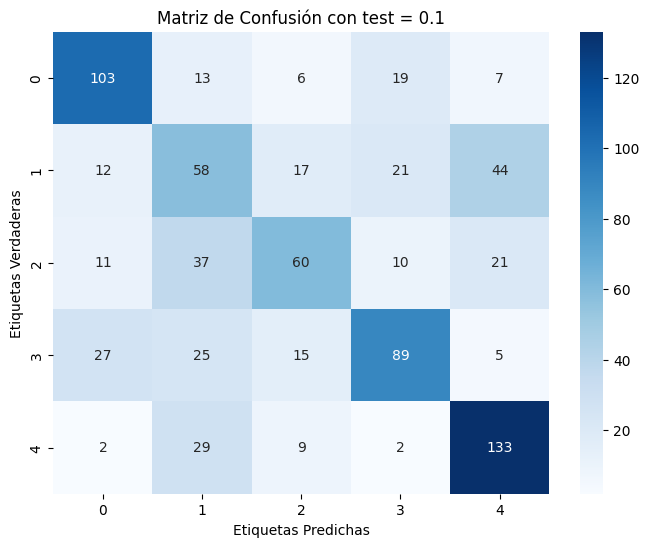

Exactitud del modelo: 0.5716129032258065
Precisión del modelo: 0.5718316286778702
Recall del modelo: 0.5716129032258065
Puntuación F1 del modelo: 0.5682339832015659
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Regresion_Logistica_val_simple/matriz_confusion_test_0.2.png


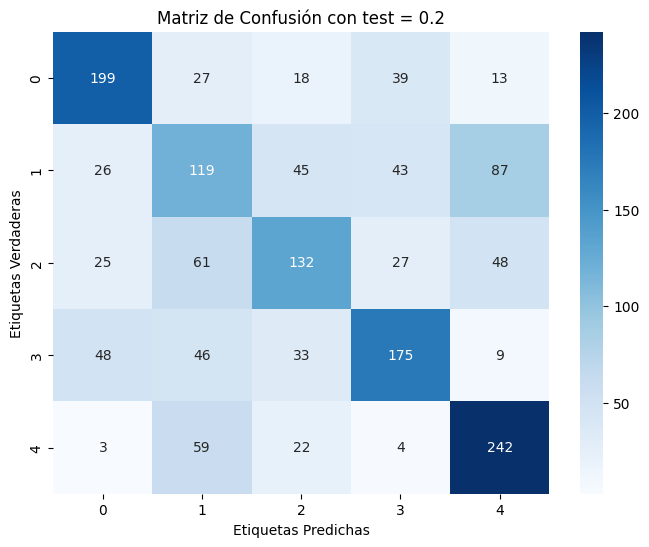

Exactitud del modelo: 0.5593548387096774
Precisión del modelo: 0.5558552932871255
Recall del modelo: 0.5593548387096774
Puntuación F1 del modelo: 0.5555528283105219
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Regresion_Logistica_val_simple/matriz_confusion_test_0.3.png


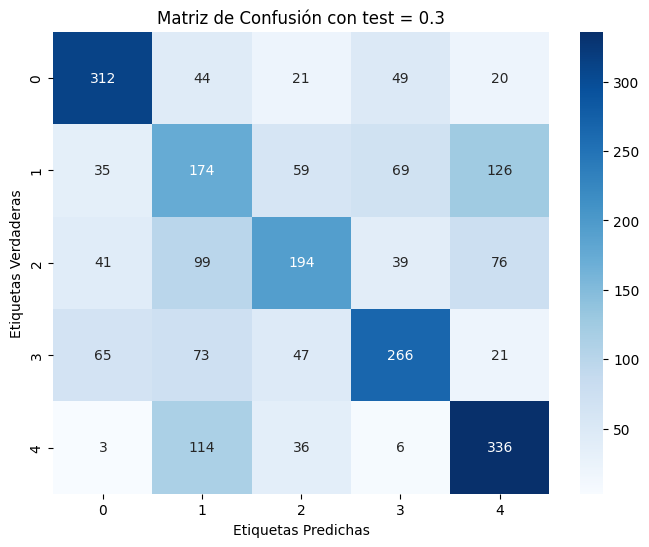

Exactitud del modelo: 0.5513978494623656
Precisión del modelo: 0.5543713639843232
Recall del modelo: 0.5513978494623656
Puntuación F1 del modelo: 0.5504184681575991
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Regresion_Logistica_val_simple/matriz_confusion_test_0.4.png


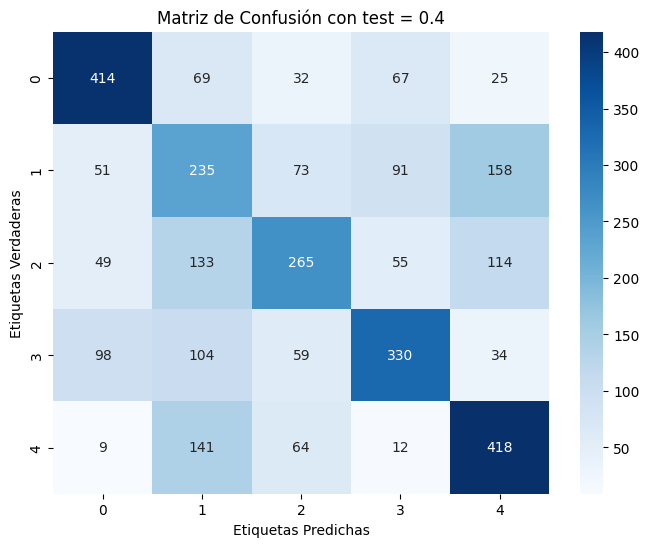

Exactitud del modelo: 0.5361290322580645
Precisión del modelo: 0.5407442717368014
Recall del modelo: 0.5361290322580645
Puntuación F1 del modelo: 0.5358901894157644
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Regresion_Logistica_val_simple/matriz_confusion_test_0.5.png


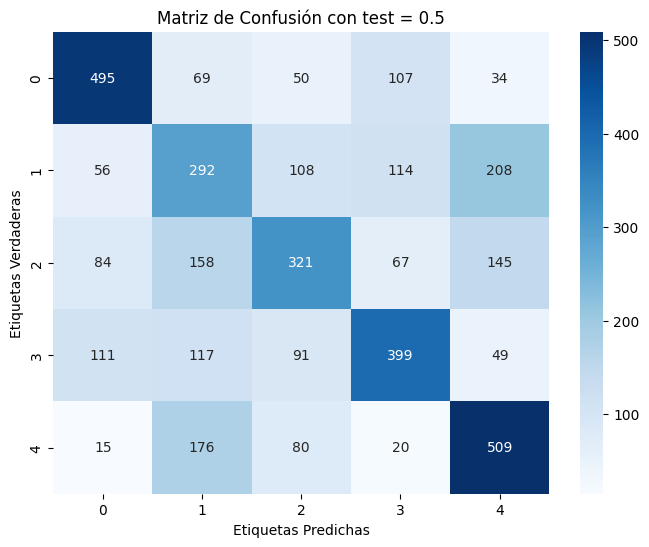

Exactitud del modelo: 0.520258064516129
Precisión del modelo: 0.5206096169694695
Recall del modelo: 0.520258064516129
Puntuación F1 del modelo: 0.5186841696546483
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Regresion_Logistica_val_simple/matriz_confusion_test_0.6.png


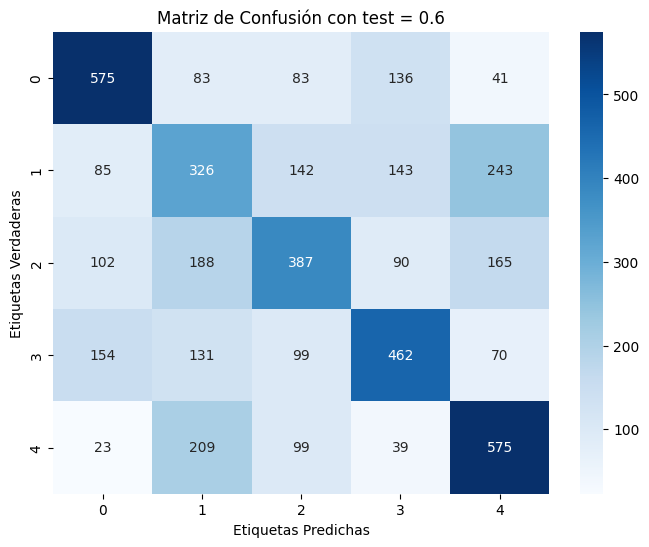

Exactitud del modelo: 0.5
Precisión del modelo: 0.49833104507944664
Recall del modelo: 0.5
Puntuación F1 del modelo: 0.4980278546651068
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Regresion_Logistica_val_simple/matriz_confusion_test_0.7.png


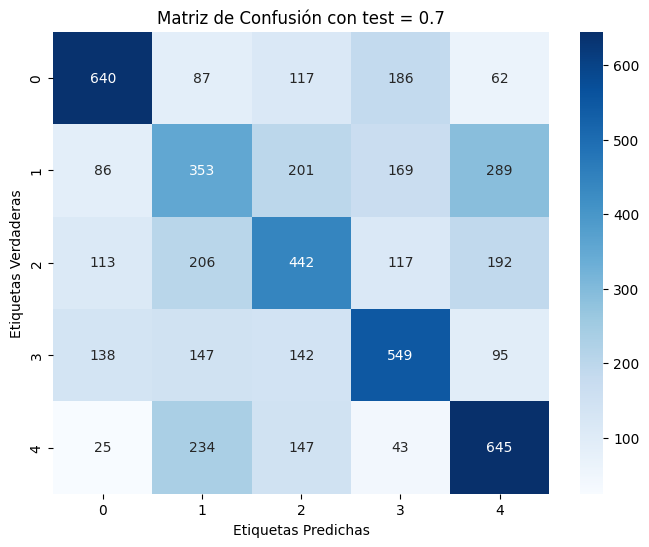

Exactitud del modelo: 0.4846082949308756
Precisión del modelo: 0.4844854931309779
Recall del modelo: 0.4846082949308756
Puntuación F1 del modelo: 0.48353855315677946
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Regresion_Logistica_val_simple/matriz_confusion_test_0.8.png


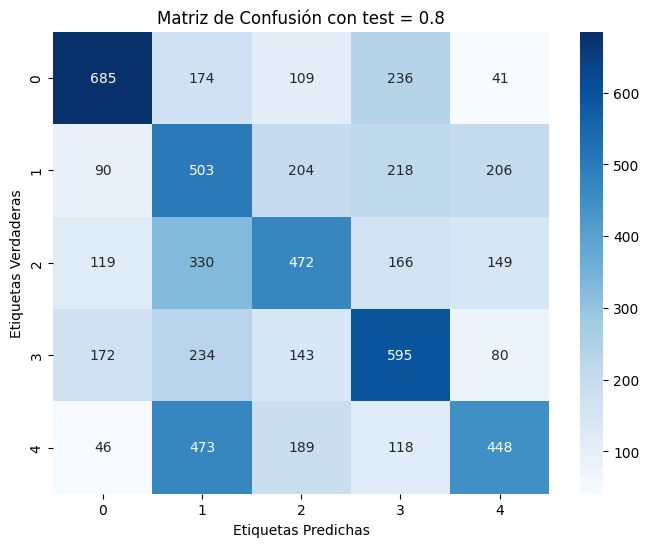

Exactitud del modelo: 0.4359677419354839
Precisión del modelo: 0.453480431380674
Recall del modelo: 0.4359677419354839
Puntuación F1 del modelo: 0.4398398926505549
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Regresion_Logistica_val_simple/matriz_confusion_test_0.9.png


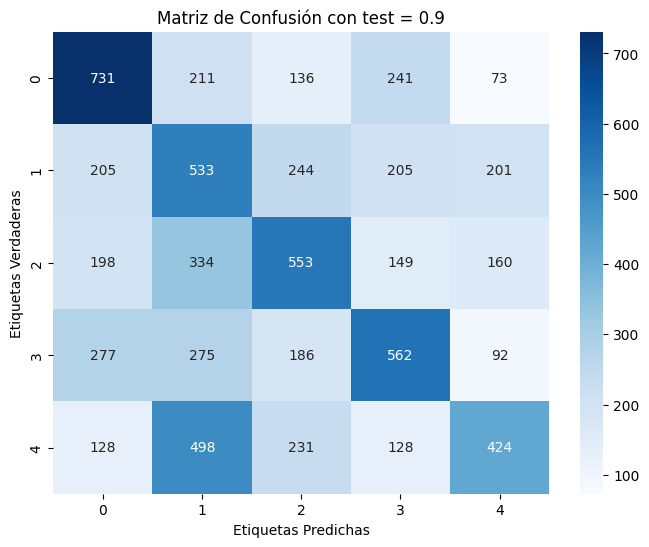

Exactitud del modelo: 0.40186379928315413
Precisión del modelo: 0.411402858499119
Recall del modelo: 0.40186379928315413
Puntuación F1 del modelo: 0.4020039873001212
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Regresion_Logistica_val_simple/regresion_logistica_val_simple.json
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Regresion_Logistica_val_cruz/matriz_confusion_cv_2.png


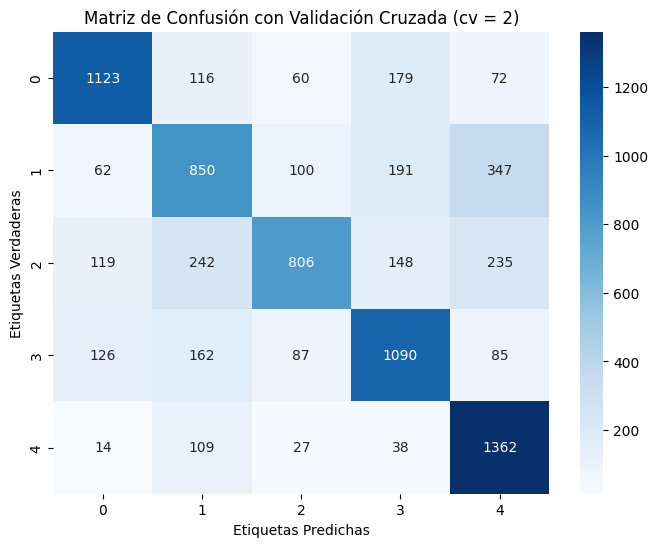

Exactitud media: 0.6749677419354839
Precisión media: 0.6818367849319886
Recall media: 0.6749677419354839
Puntuación F1 media: 0.6705071358235866
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Regresion_Logistica_val_cruz/matriz_confusion_cv_3.png


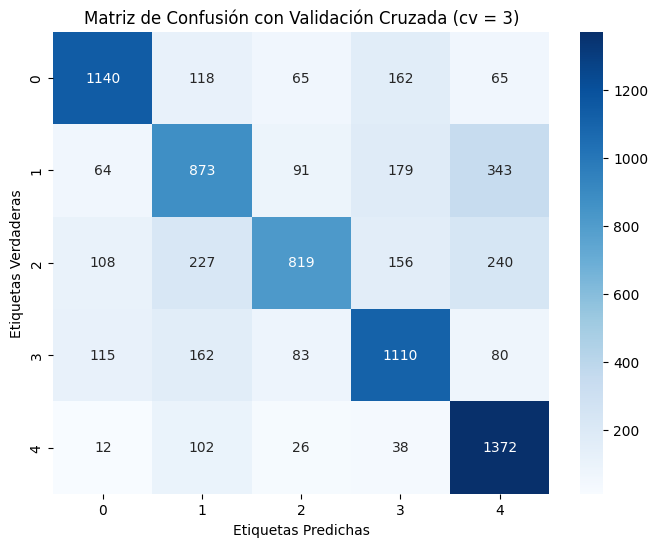

Exactitud media: 0.6856774193548387
Precisión media: 0.6929852136606346
Recall media: 0.6856774193548387
Puntuación F1 media: 0.6814277652108766
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Regresion_Logistica_val_cruz/matriz_confusion_cv_4.png


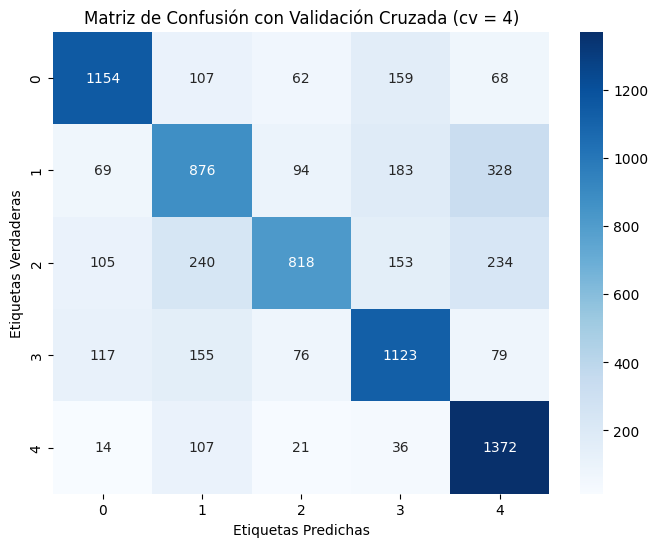

Exactitud media: 0.6894193548387096
Precisión media: 0.696576476745756
Recall media: 0.6894193548387096
Puntuación F1 media: 0.6850400293926607
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Regresion_Logistica_val_cruz/matriz_confusion_cv_5.png


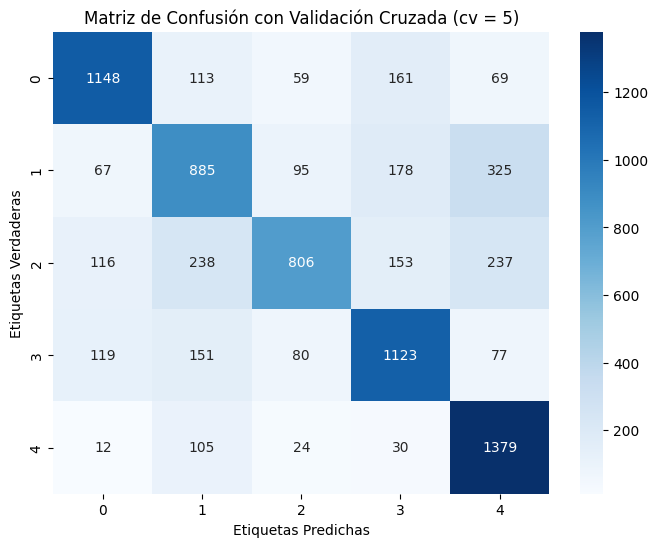

Exactitud media: 0.6891612903225807
Precisión media: 0.6958679787316593
Recall media: 0.6891612903225807
Puntuación F1 media: 0.6844216697719888
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Regresion_Logistica_val_cruz/matriz_confusion_cv_6.png


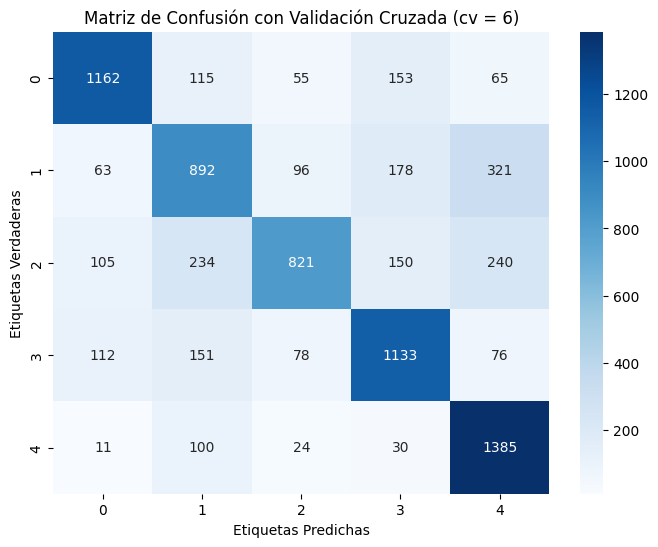

Exactitud media: 0.6958709677419355
Precisión media: 0.7029633444474302
Recall media: 0.6958709677419355
Puntuación F1 media: 0.6914366386813492
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Regresion_Logistica_val_cruz/matriz_confusion_cv_7.png


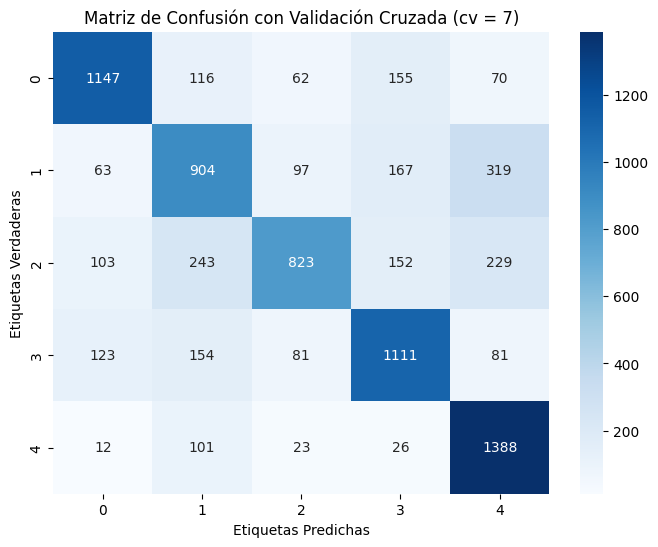

Exactitud media: 0.6932903225806452
Precisión media: 0.7000355253313995
Recall media: 0.6932903225806452
Puntuación F1 media: 0.6890250543817649
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Regresion_Logistica_val_cruz/matriz_confusion_cv_8.png


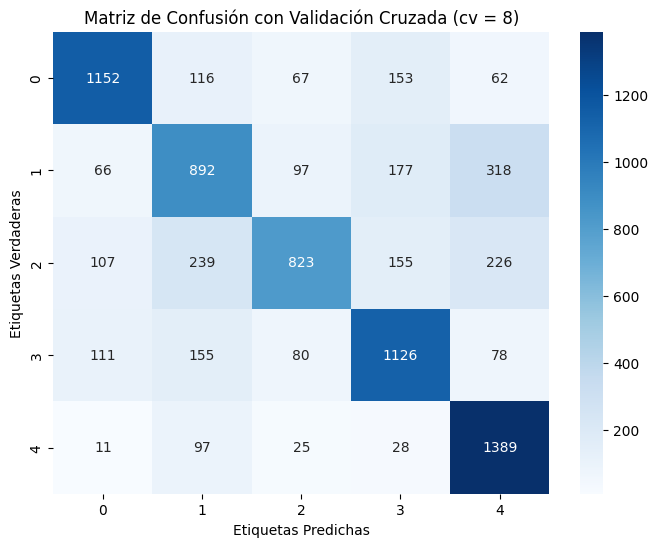

Exactitud media: 0.6944516129032258
Precisión media: 0.7003807978928702
Recall media: 0.6944516129032258
Puntuación F1 media: 0.6899673733861948
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Regresion_Logistica_val_cruz/matriz_confusion_cv_9.png


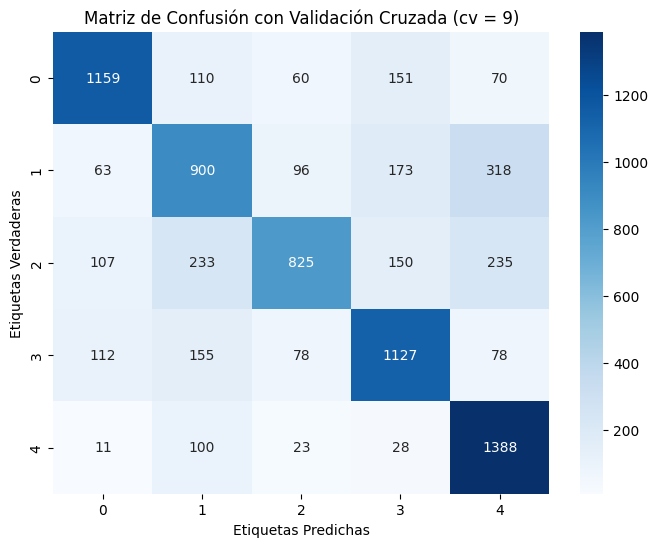

Exactitud media: 0.6966451612903226
Precisión media: 0.7035511107902928
Recall media: 0.6966451612903226
Puntuación F1 media: 0.6922955416163642
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Regresion_Logistica_val_cruz/matriz_confusion_cv_10.png


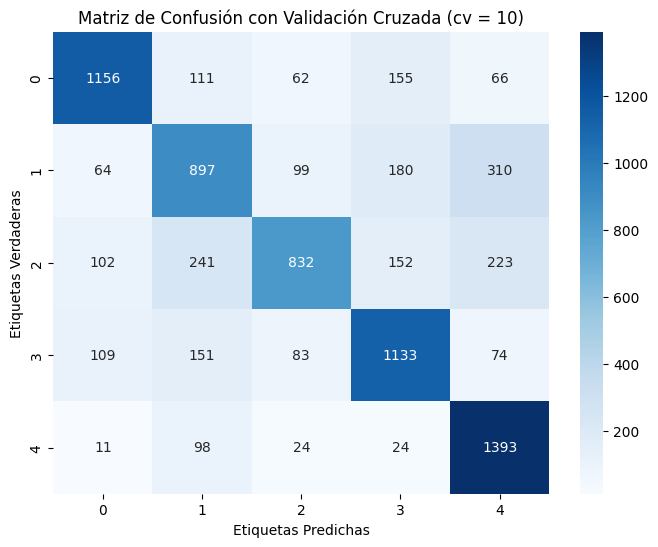

Exactitud media: 0.6981935483870968
Precisión media: 0.7040497793336086
Recall media: 0.6981935483870968
Puntuación F1 media: 0.6938308617035926
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Regresion_Logistica_val_cruz/regresion_logistica_val_cruz.json


In [92]:
import json
from sklearn.model_selection import cross_val_predict

def almacenar_informacion(resultados_finales,validacion):
    if validacion == "simple":
        ruta_archivo = "F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Regresion_Logistica_val_simple/regresion_logistica_val_simple.json"
        with open(ruta_archivo, "w") as archivo:
            json.dump(resultados_finales, archivo)
        
        print("Diccionario guardado como archivo JSON en:", ruta_archivo)
    elif validacion == "cruz":
        ruta_archivo = "F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Regresion_Logistica_val_cruz/regresion_logistica_val_cruz.json"
        with open(ruta_archivo, "w") as archivo:
            json.dump(resultados_finales, archivo)
        
        print("Diccionario guardado como archivo JSON en:", ruta_archivo)

# Inicializar una lista vacía para almacenar los valores
lista_valores = []

# Bucle for para generar los valores en incrementos de 0.10 hasta 0.9
for i in range(1, 10):
    valor = i / 10.0
    lista_valores.append(valor)

resultados_finales_val_simple = {}
resultados_finales_val_cruz = {}
experimento = 1
for i in lista_valores:
    resultados_finales_val_simple["Experimento_LR_" + str(experimento) + "_test_" + str(i)],validacion = logistic_regression(datos,1000,test_size_1=i)
    experimento = experimento + 1

almacenar_informacion(resultados_finales_val_simple,validacion)

lista = list(range(2, 11))
for j in lista:
    resultados_finales_val_cruz["Experimento_LR_" + str(experimento) + "_test_" + str(j)],validacion = logistic_regression(datos,1000,cv=j)

almacenar_informacion(resultados_finales_val_cruz,validacion)